In [1]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa import stattools
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

# https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data


## We have app data that for each user pairs reported app metrics and app name:

In [2]:
appDf = pd.read_csv("app.data", names=["user", "date", "app", "metric"])
appDf['date'] = pd.to_datetime(appDf['date'])
appDf.info()
print(appDf.user.unique(), appDf.app.unique())
appDf.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 4 columns):
user      497 non-null object
date      497 non-null datetime64[ns]
app       497 non-null object
metric    497 non-null float64
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.6+ KB
['user_2' 'user_1' 'user_3'] [' app_2' ' app_1' ' app_3']


,user,date,app,metric
0,user_2,2017-08-28 02:41:48,app_2,0.00
1,user_1,2017-08-28 11:01:01,app_1,0.01
2,user_3,2017-08-28 16:41:55,app_1,0.10
3,user_3,2017-08-29 02:43:39,app_3,0.09
4,user_1,2017-08-29 07:00:25,app_1,0.02


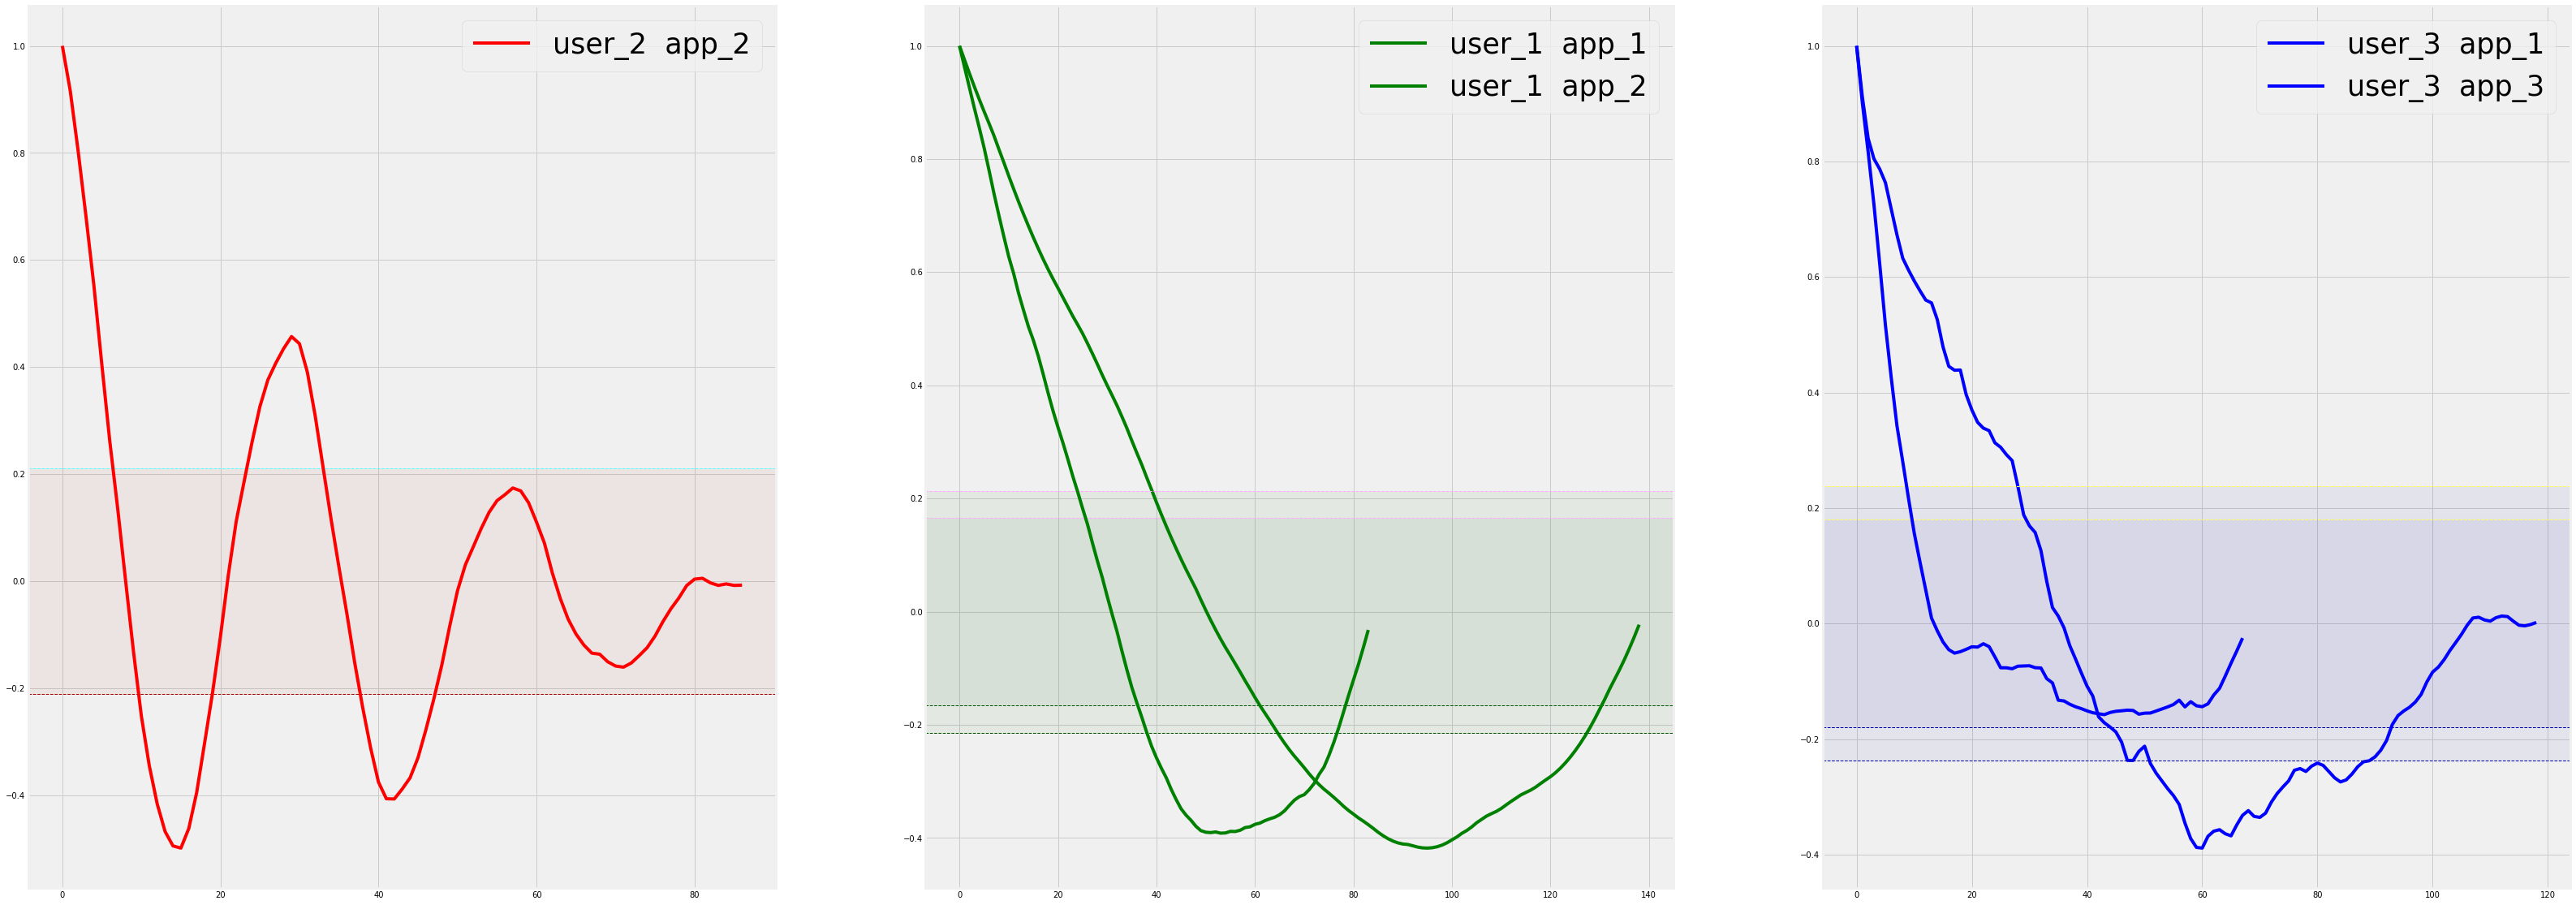

In [3]:
plt.figure(figsize=(50,20))
plt.tick_params(axis='both', which='major', labelsize=25)

plt.axhline(y=0, linewidth=1, linestyle='--', color='grey')

user_colors = ['r', 'g', 'b']

for i, user in enumerate(appDf.user.unique()):
    userDf = appDf[appDf['user'] == user]

    base_color = user_colors[i]
    
    plt.subplot(1,len(appDf.user.unique()),i+1)
    
    for app in userDf.app.unique():
        uaDf = userDf[userDf['app'] == app]
        
        e95 = 1.96/np.sqrt(len(uaDf))
        line_color = matplotlib.colors.to_rgb(base_color)
                
        plt.axhline(y=e95, linewidth=1, linestyle='--', color=1 - np.array(line_color)*0.66)
        plt.axhline(y=-1 * e95, linewidth=1, linestyle='--', color=np.array(line_color)*0.66)
        plt.axhspan(e95, -1 * e95, facecolor=np.array(line_color)*0.66, alpha=0.05)

        plt.plot(stattools.acf(uaDf['metric'], fft=True, nlags=140), label=user + " " + app, color=line_color)
        
    plt.legend(prop={'size': 35})

plt.show()

Interstingly, in the above we see that there is autocorrelation for user_2's app metric, but user_1 and user_3 just show a positive trend.

## We have location data that uses keywords for location and indicates a change of location:

In [4]:
locationDf = pd.read_csv("location.data", names=["user", "date", "location"])
locationDf['date'] = pd.to_datetime(locationDf['date'])

cross_l = pd.crosstab([locationDf.date, locationDf.user], locationDf.location)

cross_l.head(3)

location                     bar   girlfriends   grocers   home   lunch  \
date                user                                                  
2017-08-28 00:00:01 user_2     0             0         0      1       0   
                    user_3     0             0         0      1       0   
2017-08-28 19:25:16 user_3     0             0         0      0       0   

location                     park   relatives   work  
date                user                              
2017-08-28 00:00:01 user_2      0           0      0  
                    user_3      0           0      0  
2017-08-28 19:25:16 user_3      0           1      0

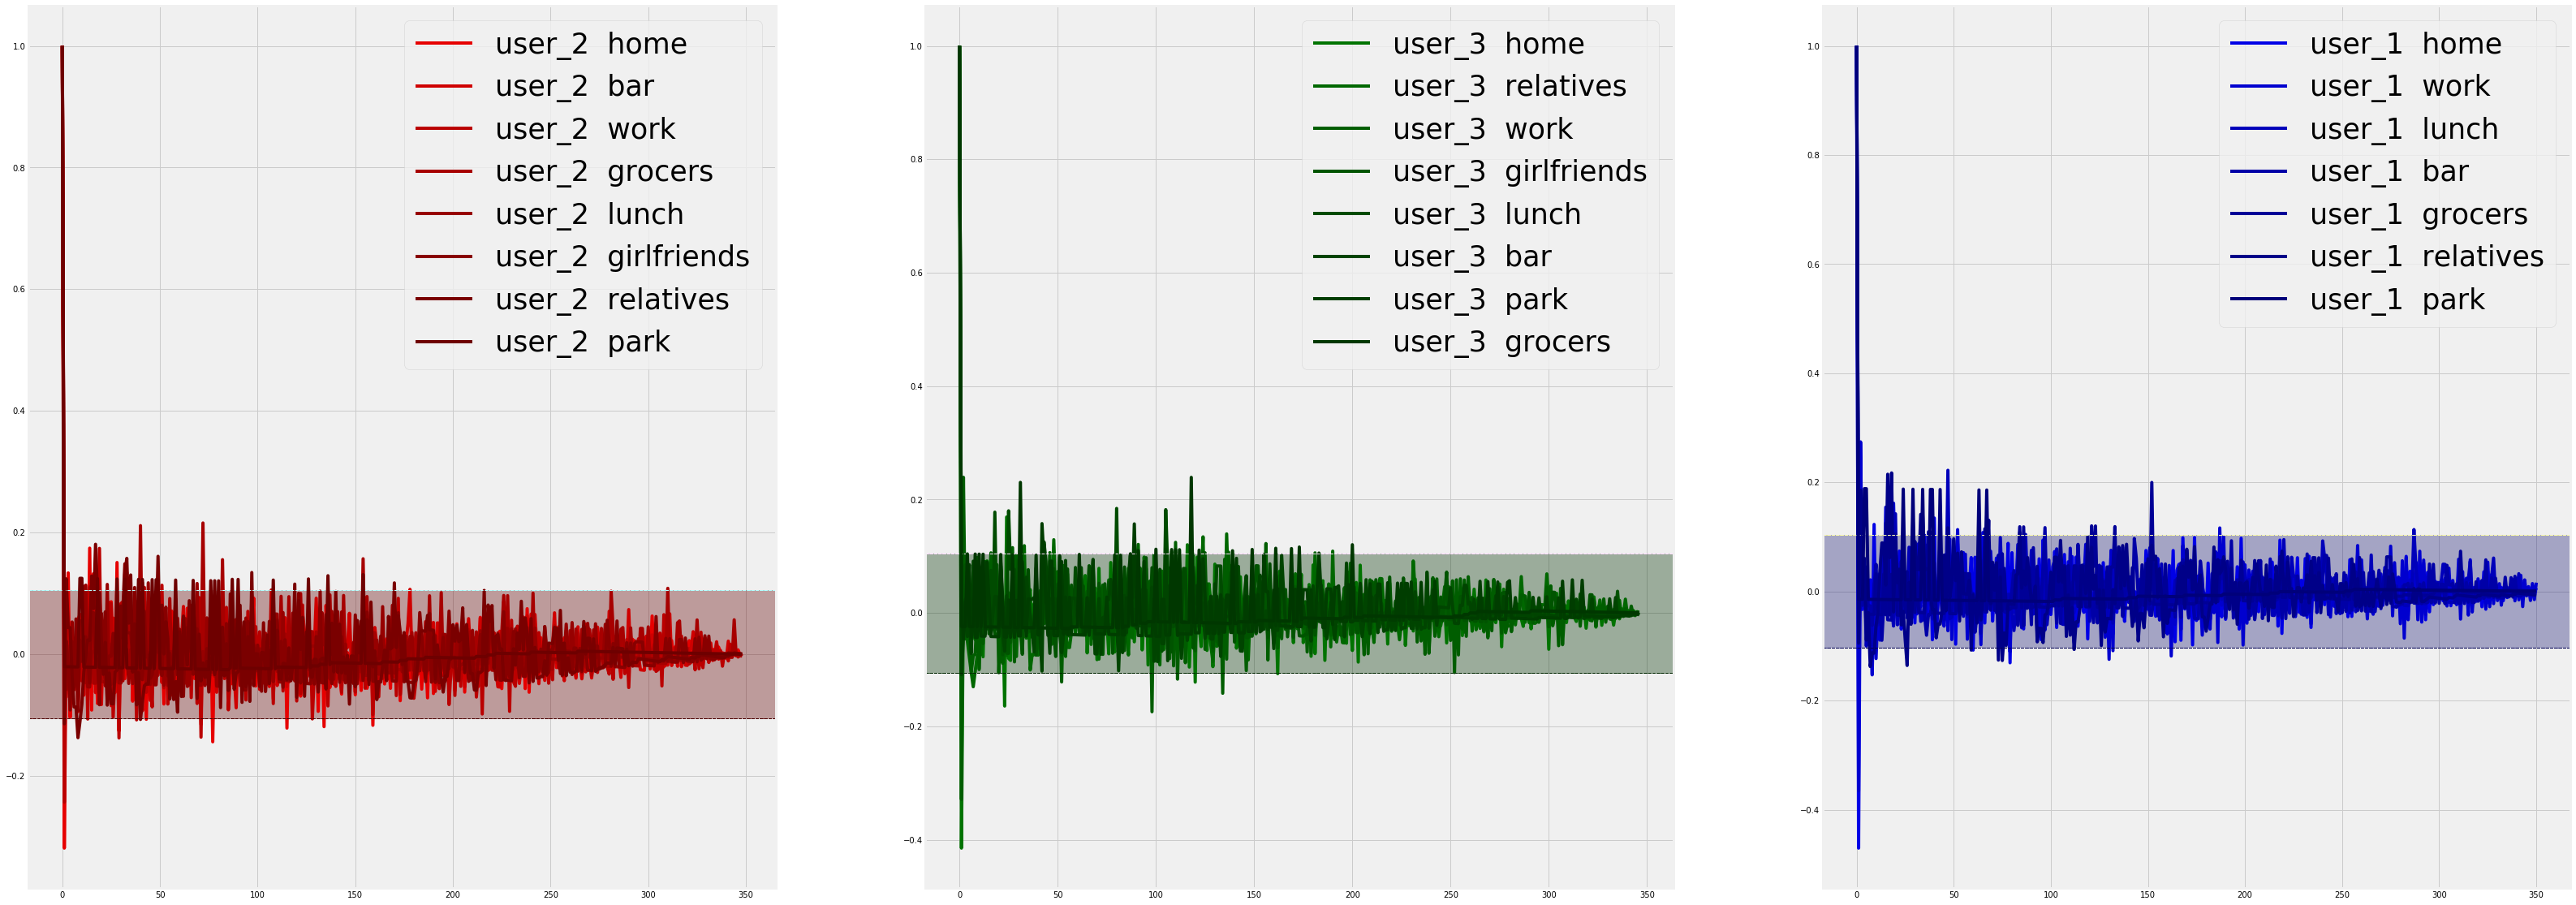

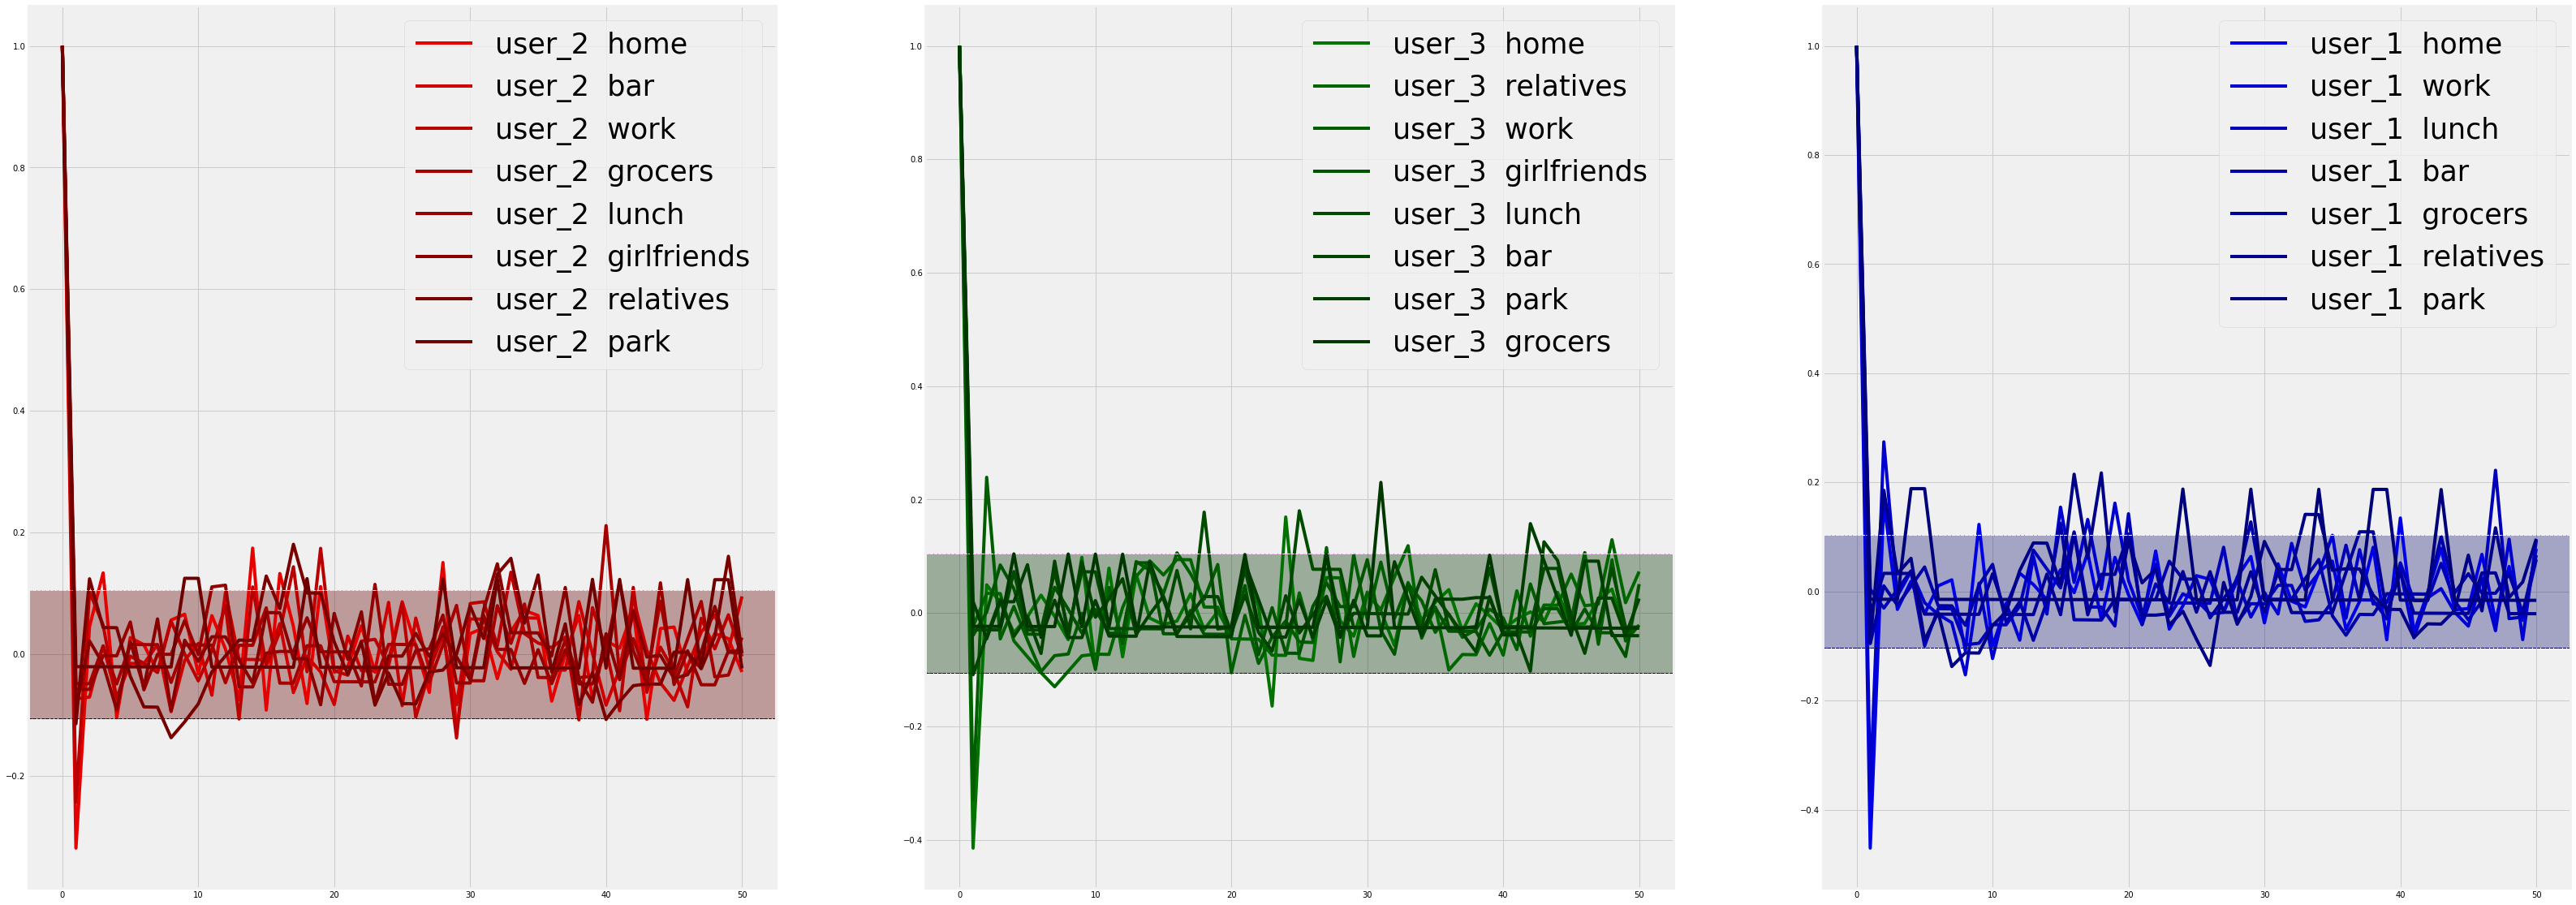

In [5]:
plt.figure(figsize=(50,20))
plt.tick_params(axis='both', which='major', labelsize=25)

plt.axhline(y=0, linewidth=1, linestyle='--', color='grey')

user_colors = ['r', 'g', 'b']

unsorted = cross_l.copy()
unsorted.reset_index(inplace=True)

for i, user in enumerate(unsorted.user.unique()):
    userDf = unsorted[unsorted['user'] == user]
    sourceDf = locationDf[locationDf['user'] == user]

    base_color = user_colors[i]
    line_color = np.array(matplotlib.colors.to_rgb(base_color))
    
    plt.subplot(1,len(unsorted.user.unique()),i+1)
    
    for location in sourceDf.location.unique():
        e95 = 1.96/np.sqrt(len(userDf))
        line_color = line_color * 0.9
                
        plt.axhline(y=e95, linewidth=1, linestyle='--', color=1 - line_color*0.66)
        plt.axhline(y=-1 * e95, linewidth=1, linestyle='--', color=line_color*0.66)
        plt.axhspan(e95, -1 * e95, facecolor=line_color*0.66, alpha=0.05)

        plt.plot(stattools.acf(userDf[location], fft=True, nlags=350), label=user + " " + location, color=line_color)
        
    plt.legend(prop={'size': 35})

plt.show()

plt.figure(figsize=(50,20))
plt.tick_params(axis='both', which='major', labelsize=25)

plt.axhline(y=0, linewidth=1, linestyle='--', color='grey')

user_colors = ['r', 'g', 'b']

unsorted = cross_l.copy()
unsorted.reset_index(inplace=True)

for i, user in enumerate(unsorted.user.unique()):
    userDf = unsorted[unsorted['user'] == user]
    sourceDf = locationDf[locationDf['user'] == user]

    base_color = user_colors[i]
    line_color = np.array(matplotlib.colors.to_rgb(base_color))
    
    plt.subplot(1,len(unsorted.user.unique()),i+1)
    
    for location in sourceDf.location.unique():
        e95 = 1.96/np.sqrt(len(userDf))
        line_color = line_color * 0.9
                
        plt.axhline(y=e95, linewidth=1, linestyle='--', color=1 - line_color*0.66)
        plt.axhline(y=-1 * e95, linewidth=1, linestyle='--', color=line_color*0.66)
        plt.axhspan(e95, -1 * e95, facecolor=line_color*0.66, alpha=0.05)

        plt.plot(stattools.acf(userDf[location], fft=True, nlags=50), label=user + " " + location, color=line_color)
        
    plt.legend(prop={'size': 35})

plt.show()

Here we see both longer and shorter ACF. I chose to add the shorter time frame because, perhaps by coincidence, by and large there seems to be a significant peak in all data at about lag = 18. I also was interested in lag ≈ 40. However, at these long intervals, the 95% confidence we are plotting in should have a few false positives.

### Seasonality
Location data includes seasonality at actual seasonal levels (summer, winter), as well as weekday/weekend behavior. Here this is demonstrated with cumsum:

'User/Locations'

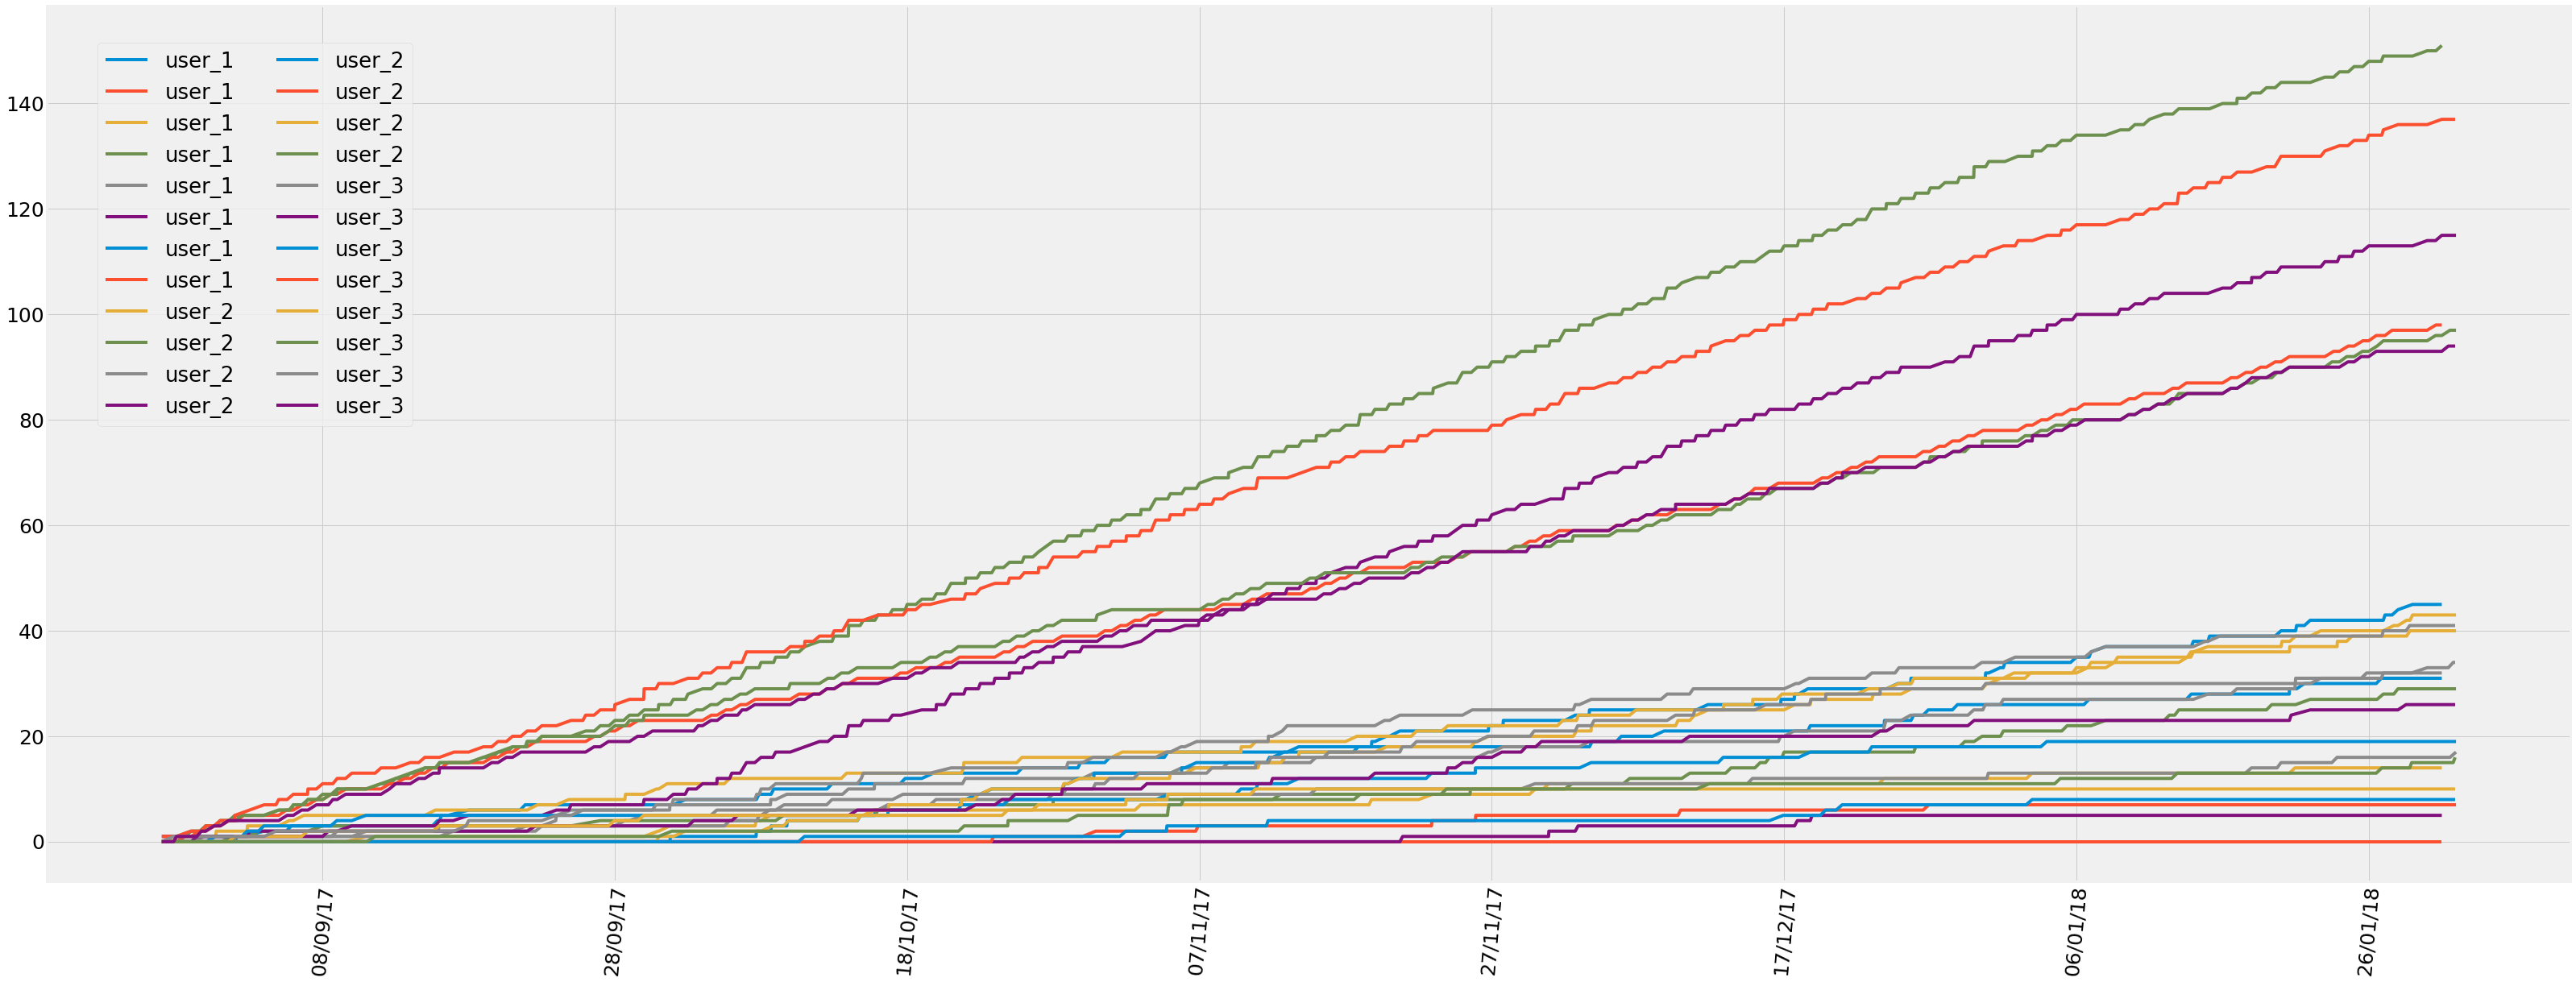

In [6]:
cross = cross_l.copy()

l2 = cross.groupby(['user']).cumsum().copy()
l2.reset_index(inplace=True)

plotaxis = plt.figure(figsize=(50,20)).gca()
for key, grp in l2.groupby(['user']):
    my_ts = [ts.to_julian_date() - 1721424.5 for ts in grp['date']]
    plt.plot(my_ts, grp.drop('user', axis=1).drop('date', axis=1), label=key)

plotaxis.xaxis.set_major_formatter(
    matplotlib.dates.DateFormatter('%d/%m/%y')
)
xlabels = plotaxis.get_xticklabels()
plt.setp(xlabels, rotation=85, fontsize=25)
ylabels = plotaxis.get_yticklabels()
plt.setp(ylabels, fontsize=25)

plt.legend(bbox_to_anchor=(.02, 0.52, 1., .102), loc=3,
           ncol=2, borderaxespad=0., prop={'size': 26})    

#l3 = l2[l2['user'] == 'user_1'].copy()
#l3['month']=l3['date'].dt.month
#grouped = l3.groupby(l3['month'])
#
#for m in grouped.groups.keys():
#    print(l3[l3['month'] == m].tail(1))
#l2.groupby(['user']).sum()

'User/Locations'

The some metric data is set to have positive or negative correlation in terms of growth, to location data. Excluding seasonality, the metric data should trend upwards:

'Users/Apps'

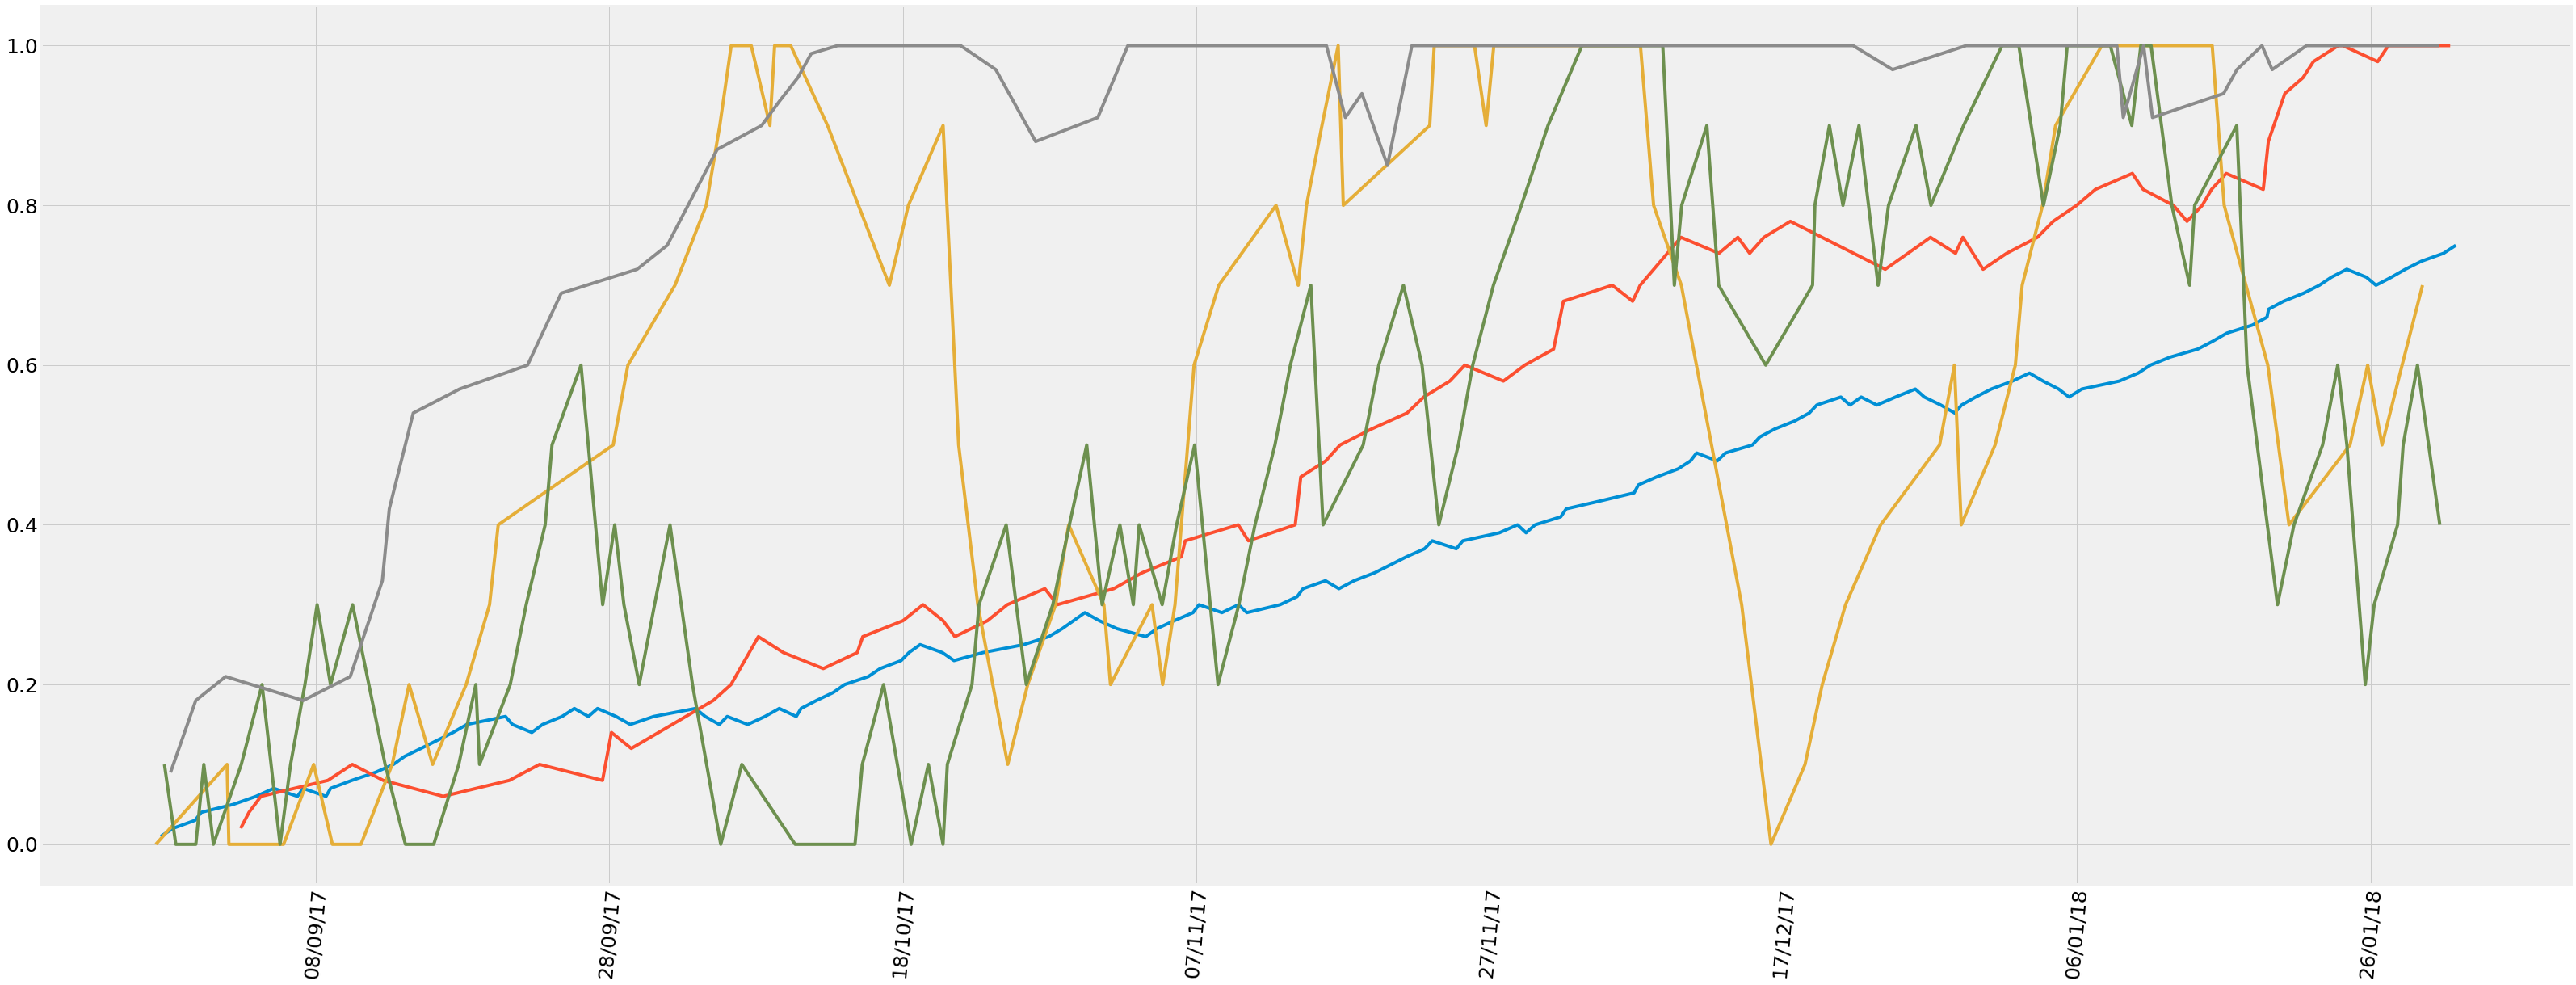

In [7]:
#appDf.groupby(['user', 'app']).plot(x="date", y="metric", subplots=True)

plotaxis = plt.figure(figsize=(50,20)).gca()
for key, grp in appDf.groupby(['user', 'app']):
    my_ts = [ts.to_julian_date() - 1721424.5 for ts in grp['date']]
    plt.plot(my_ts, grp['metric'], label='%s@%s' % ("metric", key))

plotaxis.xaxis.set_major_formatter(
    matplotlib.dates.DateFormatter('%d/%m/%y')
)
xlabels = plotaxis.get_xticklabels()
plt.setp(xlabels, rotation=85, fontsize=25)
ylabels = plotaxis.get_yticklabels()
plt.setp(ylabels, fontsize=25)
'Users/Apps'

In the next plot, we can see in fine detail user_3's metric trend and location data. Looking at the very beginning at increased zoom, you might notice a visual correlation between the first few gaps and the faster-rising app data. Frequency of use should also positively correlate.

True

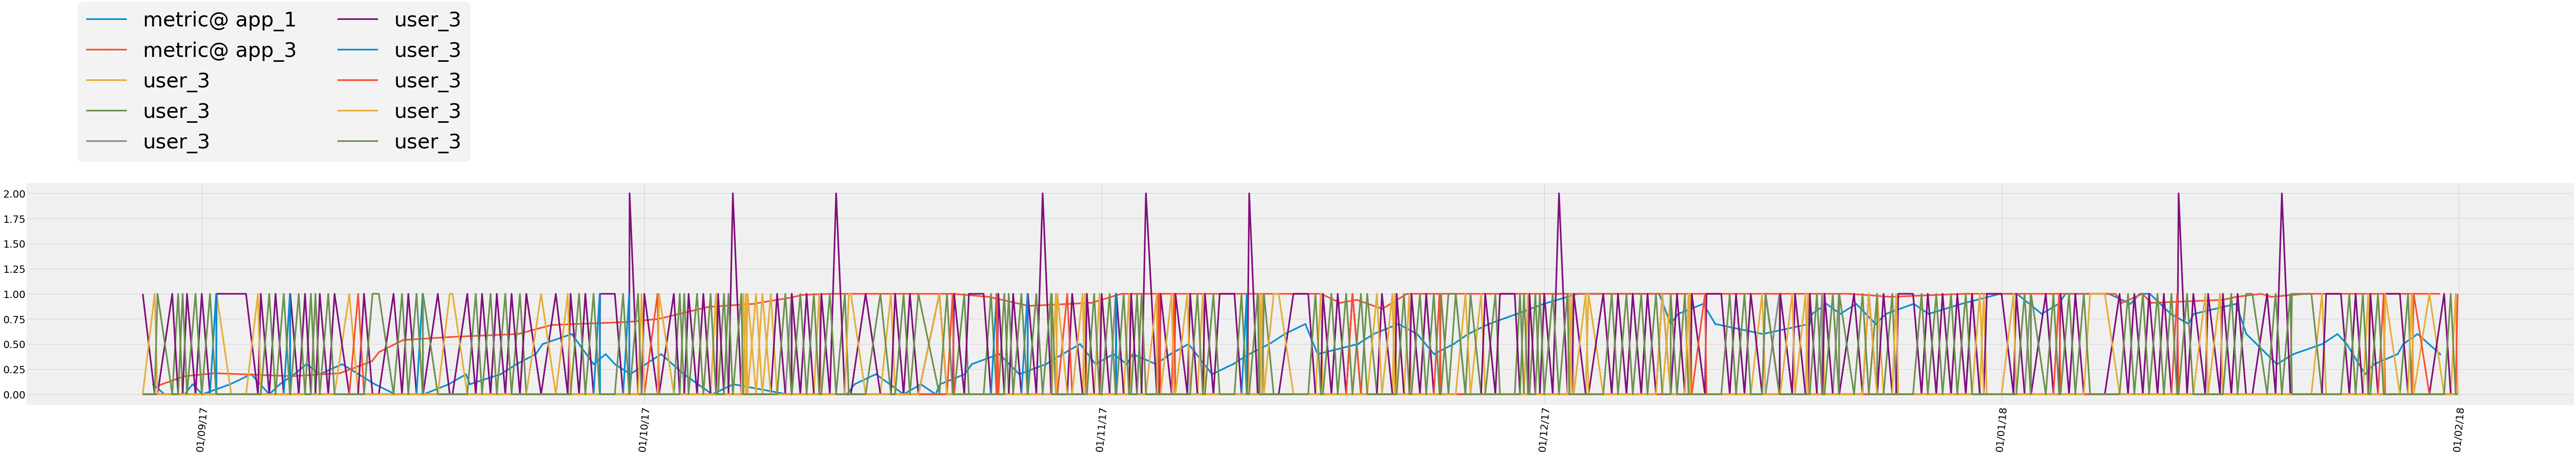

In [26]:
cross = cross_l.copy()

cross.reset_index(inplace=True)

u3_l = cross[cross['user'] == 'user_3']

u3_a = appDf[appDf['user'] == 'user_3']

u3_a1 = u1_a[u1_a['app'] == ' app_1']
u3_a2 = u1_a[u1_a['app'] == ' app_2']

plotaxis = plt.figure(figsize=(100,10)).gca()

for key, grp in u3_a.groupby(['app']):
    my_ts = [ts.to_julian_date() for ts in grp['date']]
    plt.plot(grp['date'], grp['metric'], '.-', label='%s@%s' % ("metric", key))    

for key, grp in u3_l.groupby(['user']):
    my_ts = [ts.to_julian_date() for ts in grp['date']]
    plt.plot(grp['date'], grp.drop('user', axis=1).drop('date', axis=1), label=key)
    
plotaxis.xaxis.set_major_formatter(
    matplotlib.dates.DateFormatter('%d/%m/%y')
)

xlabels = plotaxis.get_xticklabels()
plt.setp(xlabels, rotation=85, fontsize=25)
ylabels = plotaxis.get_yticklabels()
plt.setp(ylabels, fontsize=25)
plt.legend(bbox_to_anchor=(.02, 1.1, 1., .102), loc=3,
           ncol=2, borderaxespad=0., prop={'size': 50})    
True

## Preparing the data for ARIMA
We want to produce classical machine learning/statistical modeling as a baseline to justify RNN approaches. We will bin at 15 minute intervals so we have little risk of multiple location changes or app metrics per bin. 

We could leave it as a very sparse data set with only the initial location change events highlighted. However, that might leave little immediacy between the most recent location change event and the metric. When the metric occurs, it is very often at some location, but this data won't show that. Another option is to set the location value at 1 for all bins until the next location change event.

A third option is to have the location value have a half-life (in order to lessen autocorrelation).

First, we will follow this strategy in preparation of an ARIMA model:

0. resample to 15m intervals (data set would be insufficient to form the ARIMA model as the majority are errant occluding/masking/hiding the underlying predictive signal/model/equation/weighted average necessary to provide the baseline, so we will interpolate at the end)
1. fill rows in both set by date, so the data sets can be combined.
2. convert metric data to metric values per app: first creating a column for each app.
3. get column categories for location
4. divide data into per user charts.
5. combine app/metric and location data.
6. interpolate metric data per user to get curves we can predict from.

In [16]:
locDf = locationDf.copy()
locDf.set_index('date', inplace=True)

locDfs = {}
for user, user_loc_dc in locDf.groupby('user'):
    locDfs[user] = user_loc_dc.resample('15T').agg('max').bfill()
    
aDf = appDf.copy()
aDf.set_index('date', inplace=True)

userLocAppDfs = {}
for user, a2_df in aDf.groupby('user'):
    userDf = a2_df.resample('15T').agg('max')
                
    userDf.reset_index(inplace=True)
    userDf = pd.crosstab(index=userDf['date'], columns=userDf['app'], values=userDf['metric'], aggfunc=np.mean).fillna(np.nan, downcast='infer')

    userDf['user'] = user
        
    userDf.reset_index(inplace=True)
    userDf.set_index('date', inplace=True)

    userLocAppDfs[user] = userDf.resample('15T').agg('max')
            
    loDf = locDfs[user]
    loDf.reset_index(inplace=True)
    loDf = pd.crosstab([loDf.date, loDf.user], loDf.location)
    loDf.reset_index(inplace=True)

    loDf.set_index('date', inplace=True)
    loDf.drop('user', axis=1, inplace=True)
    
    userLocAppDfs[user] = userLocAppDfs[user].join(loDf, how='outer')
    userLocAppDfs[user] = userLocAppDfs[user].resample('15T').agg('max')
    userLocAppDfs[user]['user'].fillna(user, inplace=True)
    
    for loc in locationDf[locationDf['user'] == user].location.unique():
        userLocAppDfs[user][loc] = userLocAppDfs[user][loc].replace(np.nan, 0)
            
    for app in a2_df['app'].unique():
        #print(userLocAppDfs[user][app].head(10))
        #userLocAppDfs[user][app].fillna(value=0, inplace=True)
        #userLocAppDfs[user][app].replace(0.0, np.nan, inplace=True)

        userLocAppDfs[user][app].interpolate(method='linear', limit_area='inside', inplace=True)       
        userLocAppDfs[user][app].fillna(value=0, inplace=True)
        
#userLocAppDfs['user_1'].tail(5)

At this point, we have our data set per user. 
### Sample data
Here's what one user's data looks like:

In [27]:
u1 = userLocAppDfs['user_3'].copy()
u1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15064 entries, 2017-08-28 00:00:00 to 2018-01-31 21:45:00
Freq: 15T
Data columns (total 11 columns):
 app_1          15064 non-null float64
 app_3          15064 non-null float64
user            15064 non-null object
 bar            15064 non-null int64
 girlfriends    15064 non-null int64
 grocers        15064 non-null int64
 home           15064 non-null int64
 lunch          15064 non-null int64
 park           15064 non-null int64
 relatives      15064 non-null int64
 work           15064 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.4+ MB


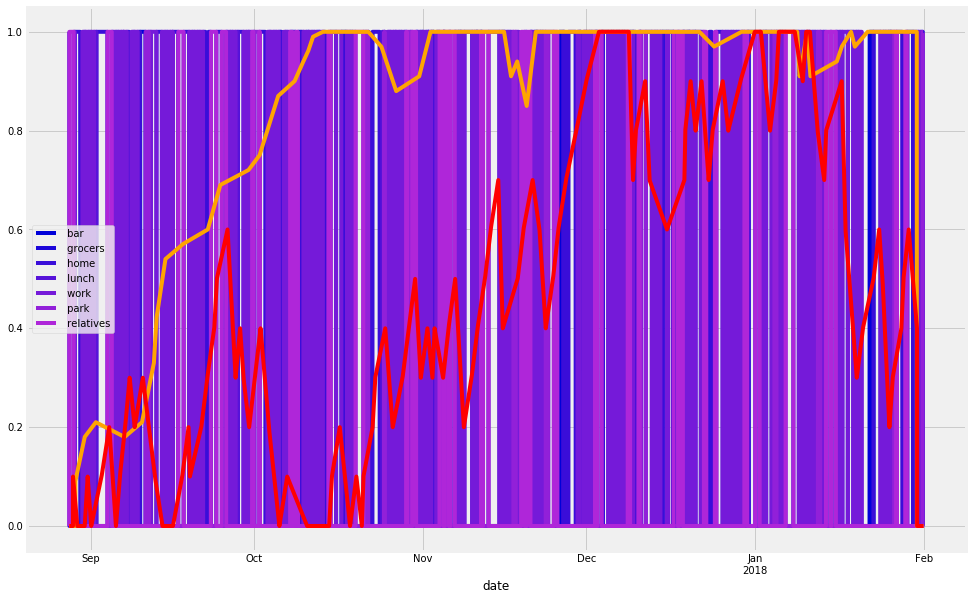

In [37]:
u1 = userLocAppDfs['user_3'].copy()
# https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
locations = [(x/8.75, x/40.0, 0.85) for x in range(9)] # color grad

u1[[' bar', ' grocers', ' home', ' lunch', ' work', ' park', ' relatives']].plot(color=locations, figsize=(15,10))
#height = 1
#
## https://stackoverflow.com/questions/52467781/how-can-i-fill-the-area-in-this-plot/52467937#52467937
#fig, ax = plt.subplots(1,1)
#for i, location in enumerate([' bar', ' grocers', ' home', ' lunch', ' work', ' park', ' relatives']):
#    ax.fill_between(range(len(u1[location])), height * u1[location], step='post', color=locations[i])
                    
u1[' app_3'].plot(color='orange')
u1[' app_1'].plot(color='r')

#u1[135:140]

In [30]:
u1.to_csv('user3.data')

print(u1.info())
u1.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15064 entries, 2017-08-28 00:00:00 to 2018-01-31 21:45:00
Freq: 15T
Data columns (total 11 columns):
 app_1          15064 non-null float64
 app_3          15064 non-null float64
user            15064 non-null object
 bar            15064 non-null int64
 girlfriends    15064 non-null int64
 grocers        15064 non-null int64
 home           15064 non-null int64
 lunch          15064 non-null int64
 park           15064 non-null int64
 relatives      15064 non-null int64
 work           15064 non-null int64
dtypes: float64(2), int64(8), object(1)
memory usage: 1.4+ MB
None


,app_1,app_3,user,bar,girlfriends,grocers,home,lunch,park,relatives,work
date,,,,,,,,,,,
2017-08-28 00:00:00,0.0,0.0,user_3,0,0,0,1,0,0,0,0
2017-08-28 00:15:00,0.0,0.0,user_3,0,0,0,0,0,0,1,0
2017-08-28 00:30:00,0.0,0.0,user_3,0,0,0,0,0,0,1,0
2017-08-28 00:45:00,0.0,0.0,user_3,0,0,0,0,0,0,1,0
2017-08-28 01:00:00,0.0,0.0,user_3,0,0,0,0,0,0,1,0


okay, let's fit a model to data through oct 3 to see if we can predict the down-trend in app_1.

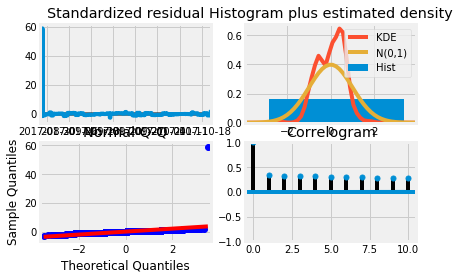

In [49]:
endog = [ ' app_1', ' app_3' ]
exog = [ ' bar', ' grocers', ' girlfriends', ' home', ' lunch', ' work', ' park', ' relatives' ] # missing park because it is constant in sample

columns = [ ' app_1', ' app_3', ' bar', ' grocers', ' girlfriends', ' home', ' lunch', ' work', ' park', ' relatives' ]
series = u1[columns]

#X = pd.DataFrame()
#for column in columns:
#    X[column] = difference(series[column].values)

size = (4*24)*54 # hoping
train, test = series[0:size], series[size:size+(28*4*24)]

train = train.loc[:, (train != train.iloc[0]).any()] # https://stackoverflow.com/questions/20209600/panda-dataframe-remove-constant-column
test = test.loc[:, (test != test.iloc[0]).any()]

#print(train.var(), X.info())

# train autoregression
#model = VARMAX(train[endog], order=(1,0), exog=train[exog])
model = VARMAX(train[endog], exog=train[exog])

model_fit = model.fit(method='powell', disp=False)
#model_fit = model.fit(disp=False)
#print(model_fit.mle_retvals)

model_fit.plot_diagnostics()

##window = model_fit.k_ar
coef = model_fit.params

predictions = model_fit.forecast(steps=len(test), exog=test[exog])


In [50]:
predDf = pd.DataFrame(predictions)
y = predDf.copy()

predDf.head(3)

,app_1,app_3
2017-10-21 00:00:00,0.086228,0.995798
2017-10-21 00:15:00,0.086742,0.991645
2017-10-21 00:30:00,0.086513,0.987511


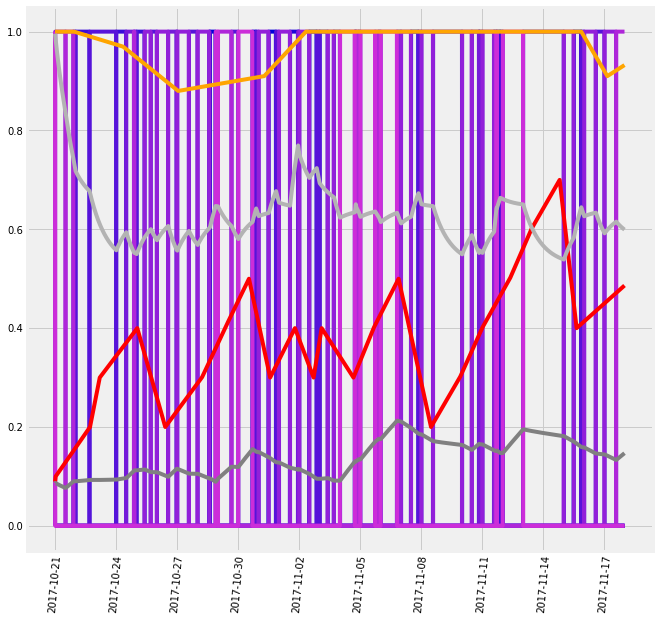

In [51]:
pFull = predDf.copy()
pFull[exog] = test[exog]
#print(mean_squared_error(test, pFull.values().toList()))

#ymax = y.max().max()
#y[exog] = y[exog]/y[exog].max()
#y[endog] = y[endog]/ymax

# plot
plotaxis = plt.figure(figsize=(10,10)).gca()

xlabels = plotaxis.get_xticklabels()
plt.setp(xlabels, rotation=85, fontsize=10)
ylabels = plotaxis.get_yticklabels()
plt.setp(ylabels, fontsize=10)

#for i, column in enumerate(exog):
#    plt.plot(y[column], color=np.array(locations[i])*0.66)

for i, column in enumerate(exog):
    plt.plot(test[column], color=locations[i])

    
plt.plot(test[' app_1'], color='red')
plt.plot(test[' app_3'], color='orange')    
    
plt.plot(y[' app_1'], color=[0.5, 0.5, 0.5])
plt.plot(y[' app_3'], color=[0.7, 0.7, 0.7])

plt.show()

Okay so this isn't a great fit, but it is a start. We see that in general the model expects the numbers to stay lower, this is probably because we are capturing the rise from start at 0, without sufficient stationary momentum. 

On the negative, the deep dive at the start on the value at 1 suggests that we probably should stop using data for a day or so after 1.0 is reached, the ceiling effects the results. 

On the positive, some of the trend moments are easy to see in the prediction, and is set at the right time windows given exog data. Provided we can actually predict exogenous data with sufficiency, we can hope to get good results predicting preceipitous drops. This is all the more true since the app can likely expect to be run more than every few days, so the prediction only needs to consider a short term. The big drop we were hoping to see in day two is barely a blip, but if there is a cutoff slope for signficance in the trend, we can make notification predictions even without accurate metric. 

To see if a neural network can easily bring added value, we need to run a prediction without provided exogenous data.